In [20]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("german_credit.csv")

In [3]:
df

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


In [4]:
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

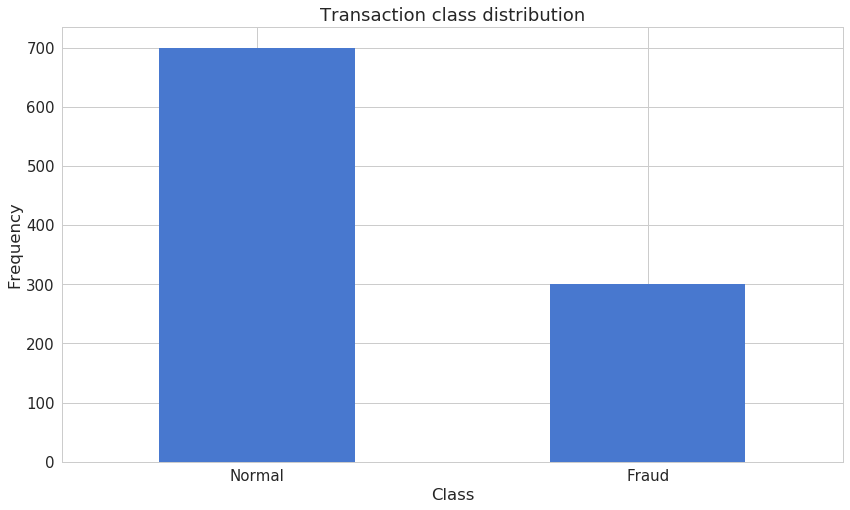

In [6]:
count_classes = pd.value_counts(df['Creditability'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [7]:
df.columns.values.tolist()

['Creditability',
 'Account Balance',
 'Duration of Credit (month)',
 'Payment Status of Previous Credit',
 'Purpose',
 'Credit Amount',
 'Value Savings/Stocks',
 'Length of current employment',
 'Instalment per cent',
 'Sex & Marital Status',
 'Guarantors',
 'Duration in Current address',
 'Most valuable available asset',
 'Age (years)',
 'Concurrent Credits',
 'Type of apartment',
 'No of Credits at this Bank',
 'Occupation',
 'No of dependents',
 'Telephone',
 'Foreign Worker']

In [8]:
df.columns = ['Creditability','Account_Balance','Duration','PaymentStatus_PreviousCredit','Purpose','Credit_Amount', \
              'Value_SavingsStocks','Length_currentEmployment','Instalment_percent','Marital_Status','Guarantors', \
              'Duration_CurrentAddress','MostValuable_asset','Age','Concurrent_Credits','Type_apartment','No_Credits', \
              'Occupation', 'No_dependents','Telephone','Foreign_Worker']

In [9]:
df

,Creditability,Account_Balance,Duration,PaymentStatus_PreviousCredit,Purpose,Credit_Amount,Value_SavingsStocks,Length_currentEmployment,Instalment_percent,Marital_Status,...,Duration_CurrentAddress,MostValuable_asset,Age,Concurrent_Credits,Type_apartment,No_Credits,Occupation,No_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


In [10]:
df['Duration'] = StandardScaler().fit_transform(df['Duration'].values.reshape(-1, 1))
df['Credit_Amount'] = StandardScaler().fit_transform(df['Credit_Amount'].values.reshape(-1, 1))
df['Value_SavingsStocks'] = StandardScaler().fit_transform(df['Value_SavingsStocks'].values.reshape(-1, 1))
df['Length_currentEmployment'] = StandardScaler().fit_transform(df['Length_currentEmployment'].values.reshape(-1, 1))
df['Instalment_percent'] = StandardScaler().fit_transform(df['Instalment_percent'].values.reshape(-1, 1))
df['Guarantors'] = StandardScaler().fit_transform(df['Guarantors'].values.reshape(-1, 1))
df['Duration_CurrentAddress'] = StandardScaler().fit_transform(df['Duration_CurrentAddress'].values.reshape(-1, 1))
df['MostValuable_asset'] = StandardScaler().fit_transform(df['MostValuable_asset'].values.reshape(-1, 1))
df['Age'] = StandardScaler().fit_transform(df['Age'].values.reshape(-1, 1))
df['No_Credits'] = StandardScaler().fit_transform(df['No_Credits'].values.reshape(-1, 1))
df['Concurrent_Credits'] = StandardScaler().fit_transform(df['Concurrent_Credits'].values.reshape(-1, 1))
df['No_dependents'] = StandardScaler().fit_transform(df['No_dependents'].values.reshape(-1, 1))
df['Telephone'] = StandardScaler().fit_transform(df['Telephone'].values.reshape(-1, 1))

/usr/local/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
df = pd.concat([df,pd.get_dummies(df['Account_Balance'], prefix='Account_Balance')],axis=1)
df.drop(['Account_Balance'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['PaymentStatus_PreviousCredit'], prefix='PaymentStatus_PreviousCredit')],axis=1)
df.drop(['PaymentStatus_PreviousCredit'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['Purpose'], prefix='Purpose')],axis=1)
df.drop(['Purpose'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['Marital_Status'], prefix='Marital_Status')],axis=1)
df.drop(['Marital_Status'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['Type_apartment'], prefix='Type_apartment')],axis=1)
df.drop(['Type_apartment'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['Occupation'], prefix='Occupation')],axis=1)
df.drop(['Occupation'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['Foreign_Worker'], prefix='Foreign_Worker')],axis=1)
df.drop(['Foreign_Worker'],axis=1, inplace=True)

In [12]:
RANDOM_SEED = 42

X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Creditability == 0]
X_train = X_train.drop(['Creditability'], axis=1)

y_test = X_test['Creditability']
X_test = X_test.drop(['Creditability'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [13]:
X_train.shape

(238, 45)

In [14]:
input_dim = X_train.shape[1]

In [15]:
input_dim

45

In [16]:
encoding_dim = 22

In [17]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [29]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1).history

Train on 238 samples, validate on 200 samples
Epoch 1/100
238/238 [==============================] - 0s 581us/step - loss: 0.2043 - acc: 0.5084 - val_loss: 0.2483 - val_acc: 0.4000
Epoch 2/100
238/238 [==============================] - 0s 81us/step - loss: 0.2035 - acc: 0.5294 - val_loss: 0.2476 - val_acc: 0.3700
Epoch 3/100
238/238 [==============================] - 0s 95us/step - loss: 0.2035 - acc: 0.5168 - val_loss: 0.2474 - val_acc: 0.3850
Epoch 4/100
238/238 [==============================] - 0s 108us/step - loss: 0.2034 - acc: 0.5168 - val_loss: 0.2475 - val_acc: 0.3700
Epoch 5/100
238/238 [==============================] - 0s 106us/step - loss: 0.2033 - acc: 0.5168 - val_loss: 0.2474 - val_acc: 0.3700
Epoch 6/100
238/238 [==============================] - 0s 102us/step - loss: 0.2031 - acc: 0.5252 - val_loss: 0.2466 - val_acc: 0.3700
Epoch 7/100
238/238 [==============================] - 0s 109us/step - loss: 0.2028 - acc: 0.5252 - val_loss: 0.2469 - val_acc: 0.3750
Epoch 8/100

238/238 [==============================] - 0s 100us/step - loss: 0.2005 - acc: 0.5168 - val_loss: 0.2436 - val_acc: 0.3600
Epoch 62/100
238/238 [==============================] - 0s 103us/step - loss: 0.2005 - acc: 0.5084 - val_loss: 0.2439 - val_acc: 0.4150
Epoch 63/100
238/238 [==============================] - 0s 99us/step - loss: 0.2004 - acc: 0.5042 - val_loss: 0.2431 - val_acc: 0.3850
Epoch 64/100
238/238 [==============================] - 0s 110us/step - loss: 0.2004 - acc: 0.5252 - val_loss: 0.2440 - val_acc: 0.3950
Epoch 65/100
238/238 [==============================] - 0s 109us/step - loss: 0.2004 - acc: 0.5210 - val_loss: 0.2431 - val_acc: 0.3650
Epoch 66/100
238/238 [==============================] - 0s 111us/step - loss: 0.2003 - acc: 0.5294 - val_loss: 0.2437 - val_acc: 0.3800
Epoch 67/100
238/238 [==============================] - 0s 111us/step - loss: 0.2002 - acc: 0.5294 - val_loss: 0.2432 - val_acc: 0.3900
Epoch 68/100
238/238 [==============================] - 0s 107

In [40]:
history

{'acc': [0.50840336084365845,
  0.5294117652067617,
  0.51680672318995502,
  0.51680672293951535,
  0.5168067241917137,
  0.52521008503537214,
  0.52521008553625159,
  0.52521008428405314,
  0.53361344612947026,
  0.52521008553625159,
  0.52521008403361347,
  0.51260504226724646,
  0.52941176470588236,
  0.52941176370412357,
  0.52100840361178424,
  0.52521008353273413,
  0.51260504201680668,
  0.512605041015048,
  0.51260504201680668,
  0.52941176620852048,
  0.54201680747400816,
  0.52521008553625159,
  0.51260504251768613,
  0.52941176620852048,
  0.52941176470588236,
  0.51260504151592734,
  0.52521008353273413,
  0.51260504226724646,
  0.51260504201680668,
  0.51260504226724646,
  0.51680672369083436,
  0.52100840286046513,
  0.51260504226724646,
  0.52100840436310325,
  0.51260504226724646,
  0.50840336084365845,
  0.54201680722356849,
  0.51680672293951535,
  0.51260504151592734,
  0.51260504151592734,
  0.51680672268907568,
  0.5,
  0.52521008403361347,
  0.50840336084365845,
 

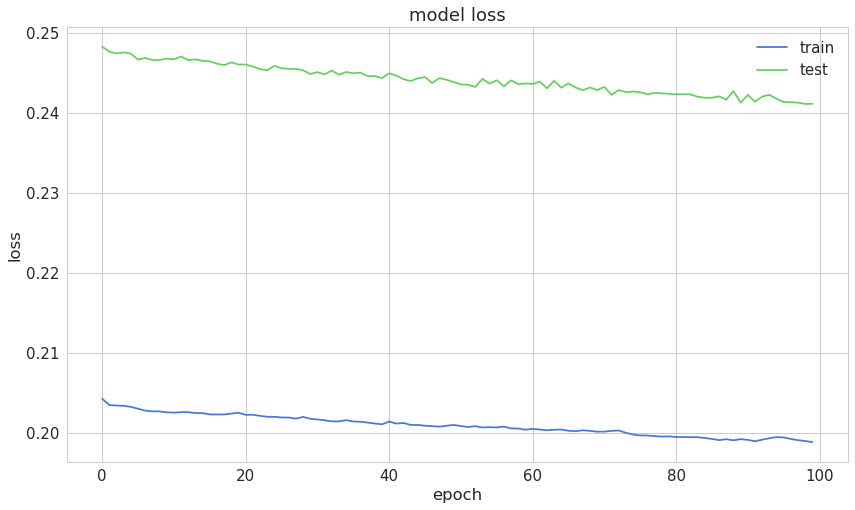

In [30]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [31]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [47]:
X_test[1]

array([-0.24085723, -0.75221277,  1.19995005, -0.31795924,  0.91847717,
       -0.30368573,  0.14050471, -1.29372298,  0.92165392,  0.46083068,
        1.02707891, -0.42828957, -0.82331789,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ])

In [52]:
error_df['reconstruction_error'].groupby(error_df['true_class']).describe()

,count,mean,std,min,25%,50%,75%,max
true_class,,,,,,,,
0,62.0,0.206070,0.096378,0.064835,0.142265,0.199983,0.238973,0.566828
1,138.0,0.245802,0.127691,0.066073,0.158831,0.212505,0.302057,0.678577


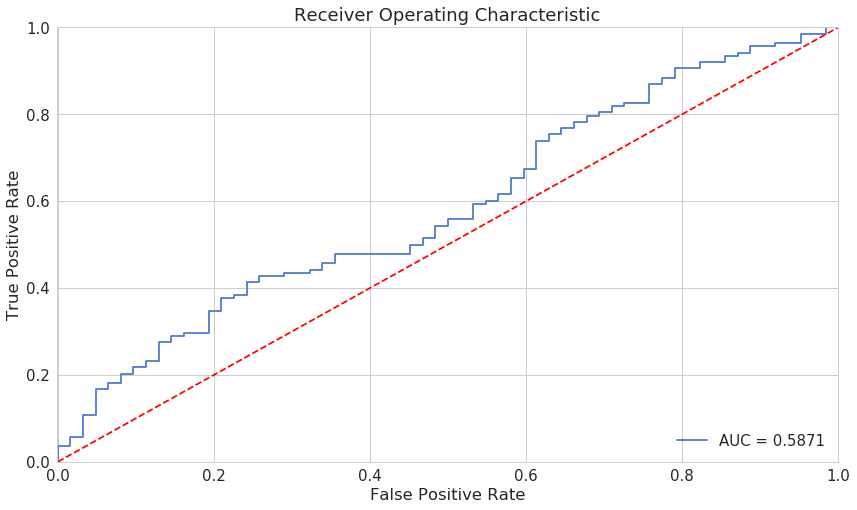

In [32]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();